In [1]:
#this file is to optimize the parameters in a single LSTM like number of neurons per layer
#and number of epoch
import numpy as np 
import pandas as pd 

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.
/Users/david/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
print ('following code is to do classification of price change in next 5min')
print('*'*60)

following code is to test whether multiple currency data may help improving accuracy
************************************************************


In [2]:
%run pathtodata.py
file_path = os.path.join(pathtodata(), 'poloniex_usdt_pairs.csv')
pdf = pd.read_csv(file_path)

new_df = pd.DataFrame(pdf[1:])
new_df = new_df.set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))
#BCH data set has too many NAN value, so I discard it
df1=new_df.drop({'USDT_BCH','USDT_BCH.1','USDT_BCH.2'},axis=1)
#discard the NAN value in last 3 rows
df1=df1[:-3]
#df1.isnull().sum()
x_set=df1.iloc[:,2:3]
y_set=df1.iloc[1:,2:3]
y_set=y_set.apply(lambda x: pd.Series([float(i) for i in x]))
y_change=abs(y_set-x_set[:-1])
y_growth=y_change/x_set[:-1]


/Users/david/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
x_set.shape

(125388, 33)

In [37]:
def main_training (x,y,train_end,data_to_use, n_neuron,n_epoch):
   
    x_train=np.array(x[0:train_end])
    y_train=np.array(y[0:train_end])
    x_test=np.array(x[train_end:data_to_use])
    y_test=np.array(y[train_end:data_to_use])

    print(x_train.shape,x_test.shape)
    print(y_train.shape,y_test.shape)
    x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
    x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
    
    mod1 = Sequential ()
    mod1.add (LSTM (n_neuron, activation = 'relu', inner_activation = 'hard_sigmoid' , input_shape =(1,1),return_sequences=False))
    mod1.add(Dropout(0.2))
    #mod1.add (LSTM (50, activation = 'tanh', inner_activation = 'hard_sigmoid' ,return_sequences=True))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=False ))
    #mod1.add(Dropout(0.2))
    
    mod1.add (Dense (output_dim =1, activation = 'linear'))
 
    mod1.compile (loss ="mae" , optimizer = "adam")   
    mod1.fit (x_train, y_train, batch_size =int(len(x_train)/n_epoch), nb_epoch =n_epoch, shuffle = False)
    
    trainpredict=mod1.predict(x_train)
    testpredict=mod1.predict(x_test)
    
    
    return (trainpredict, testpredict,y_train,y_test)

In [38]:
def mean_error_dollar (trainpredict,testpredict,y_train,y_test,change_factor=None):
    #mean_error_square=sum((y_test-testpredict)**2)/len(y_test)
    print(np.append(np.array(trainpredict),np.array(testpredict)))
    predict=scaler_y.inverse_transform((np.append(np.array(trainpredict),np.array(testpredict))).reshape(-1,1))
    y=scaler_y.inverse_transform((np.append(np.array(y_train),(np.array(y_test)))).reshape(-1,1))
    #trainpredict=scaler_x.inverse_transform(np.array(trainpredict))
    y_train=y[:train_end]
    y_test=y[train_end:]
    trainpredict=predict[:train_end]
    testpredict=predict[train_end:]
    
    #plot training set and testing set prediction vs real data
    plt.figure()
    plt.plot(y_train,color='blue',linewidth=0.4,label='Real')
    plt.plot(trainpredict, color='red',linewidth=0.4,label='Predict')
    #plt.figure()
    #plt.plot(trainpredict, color='red')
    plt.title('training set'+change_factor)
    plt.xlabel('Time Points',fontsize=14)
    plt.ylabel('US Dollars',fontsize=14)
    
    plt.figure()
    plt.plot(y_test,color='blue',linewidth=0.4)
    plt.plot(testpredict, color='red',linewidth=0.4)
    #plt.figure()
    #plt.plot(testpredict, color='red')
    plt.title('test set'+change_factor)
    plt.xlabel('Time Points',fontsize=14)
    plt.ylabel('US Dollars',fontsize=14)
    
    plt.figure()
    plt.plot(y_test[24800:],color='blue',linewidth=0.4)
    plt.plot(testpredict[24800:], color='red',linewidth=0.4)
    #plt.figure()
    #plt.plot(testpredict, color='red')
    plt.title('test set'+change_factor)
    plt.xlabel('Time Points',fontsize=14)
    plt.ylabel('US Dollars',fontsize=14)
    mean_error_test=sum(abs(y_test-testpredict))/len(y_test)
    mean_error_train=sum(abs(y_train-trainpredict))/len(y_train)
    return (mean_error_test,mean_error_train)


(100304, 33) (25076, 33)
(100304, 1) (25076, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(500, activation="relu", input_shape=(1, 33), return_sequences=False, recurrent_activation="hard_sigmoid")`
  
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
100304/100304 [==============================] - 30s 294us/step - loss: 0.0215
Epoch 2/50
100304/100304 [==============================] - 22s 222us/step - loss: 0.0836
Epoch 3/50
100304/100304 [==============================] - 22s 217us/step - loss: 0.0425
Epoch 4/50
100304/100304 [==============================] - 22s 222us/step - loss: 0.0456
Epoch 5/50
100304/100304 [==============================] - 22s 219us/step - loss: 0.0557
Epoch 6/50
100304/100304 [==============================] - 22s 219us/step - loss: 0.0651
Epoch 7/50
100304/100304 [==============================] - 22s 216us/step - loss: 0.0452
Epoch 8/50
100304/100304 [==============================] - 22s 219us/step - loss: 0.0228
Epoch 9/50
100304/100304 [==============================] - 22s 218us/step - loss: 0.0305
Epoch 10/50
100304/100304 [==============================] - 22s 218us/step - loss: 0.0212
Epoch 11/50
100304/100304 [==============================] - 22s 218us/step - loss: 0.0239
Epoch 12

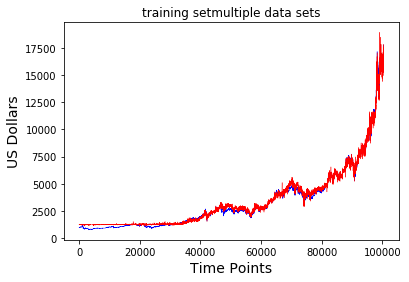

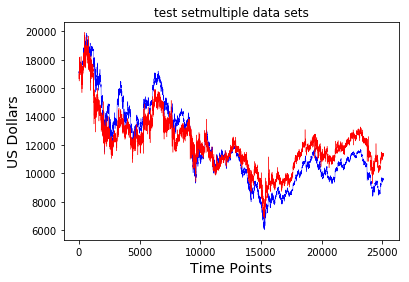

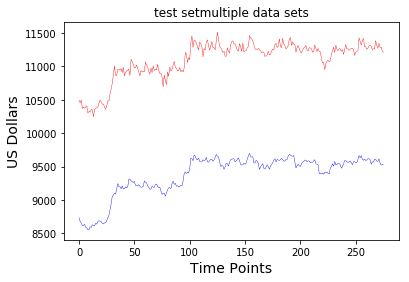

In [39]:
#normalization
scaler_x=MinMaxScaler(feature_range=(0,1))
x=scaler_x.fit_transform(x_set)
scaler_y=MinMaxScaler(feature_range=(0,1))
y=scaler_y.fit_transform(y_set)


data_to_use=125380
train_end=int(data_to_use*0.8)
total_data=len(df1)
#start=total_data-data_to_use
#n_neurons=[1,5,10,50,100,200]
n_neuron=500
n_epoch=50

mean_error_test_l=list([])
mean_error_train_l=list([])

trainpredict,testpredict,y_train,y_test=main_training(x,y,train_end,data_to_use, n_neuron,n_epoch)
mean_error_test,mean_error_train=mean_error_dollar(trainpredict,testpredict,y_train,y_test,
                                                   change_factor='{}'.format('multiple data sets'))
mean_error_test_l.append(mean_error_test)
mean_error_train_l.append(mean_error_train)

[ 0.02536187  0.02542186  0.02533581 ...,  0.55055088  0.54725742
  0.54663402]


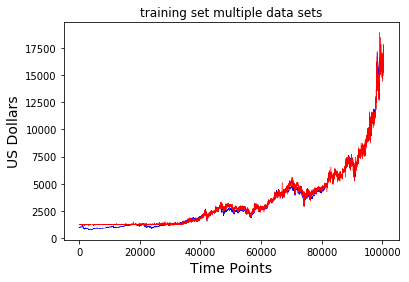

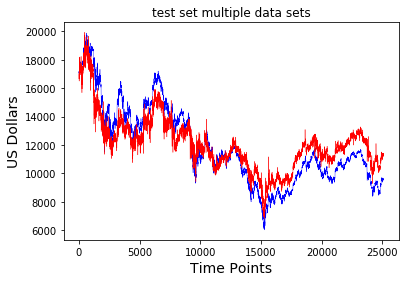

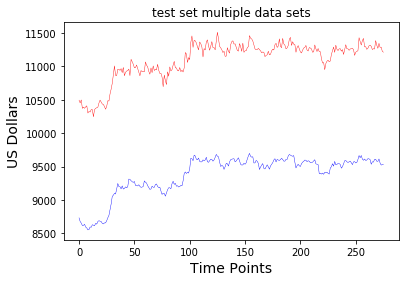

In [40]:

mean_error_test,mean_error_train=mean_error_dollar(trainpredict,testpredict,y_train,y_test,
                                                   change_factor='{}'.format(' multiple data sets'))

In [174]:
n_coin=[]
mean_error_test_l=[]
mean_error_train_l=[]



In [182]:
n_coin.append([11])
mean_error_test_l.append(mean_error_test)
mean_error_train_l.append(mean_error_train)

In [183]:
print(n_coin,mean_error_test_l)

[[3], [11]] [array([ 2307.81680444]), array([ 2307.81680444])]


In [196]:
mean_error_test

array([ 1853.43832004])